## # Data Compliance Check for applying MCMC

In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('ignore')     #switch betweeb 'default' and 'ignore'
import traceback

''' Set debug flag to view extended error messages; else set it to False to turn off debugging mode '''
debug = True

When using Markov Chain Monte Carlo (MCMC) for generating a representative sample, there are several important criteria and characteristics of your training data you should check:
1. **Stationarity** - Your data should come from a stationary distribution. Time series data should not have trends or seasonality that would affect the underlying distribution you're trying to sample from.
2. **Sufficient data volume** - You need enough data to accurately estimate the target distribution. Sparse datasets can lead to poor MCMC performance.
3. **Representativeness** - Your training data should adequately cover the full distribution you're trying to sample from, including rare events or edge cases.
4. **Dimensionality** - Consider the dimensionality of your problem. High-dimensional spaces can suffer from the \"curse of dimensionality,\" making MCMC less efficient.
5. **Correlation structure** - Understand the correlation structure in your data. Highly correlated variables can slow down MCMC convergence.
6. **Multimodality** - Check if your distribution has multiple modes. Multimodal distributions can trap MCMC chains in local optima.
7. **Boundary conditions** - Verify if your parameter space has constraints or boundaries that need special handling in your MCMC implementation.
8. **Mixing properties** - Data that leads to good \"mixing\" properties is ideal for MCMC. Poor mixing means your chain takes longer to explore the full distribution.
9. **Prior knowledge** - Consider whether you have reliable prior information that can be incorporated into your MCMC approach.
10. **Noise characteristics** - Understand the noise profile in your data, as this affects how you should set up your MCMC sampler."

In [18]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark.sql import functions as F

proj_dir = os.path.abspath(os.pardir)
sys.path.insert(1,proj_dir.split('mining/')[0])
# from rezaware.modules.etl.loader import sparkRDBM as db
# from rezaware.modules.etl.loader import sparkFile as file
from mining.modules.budget.evaluation import __propAttr__ as attr
from mining.modules.budget.evaluation import mcmcDataCompliance as mcmc
from mining.modules.budget.optimization import rwAdsDataFile as file

''' restart initiate classes '''
if debug:
    import importlib
    mcmc = importlib.reload(mcmc)
    # file=importlib.reload(file)
    attr=importlib.reload(attr)

__desc__ = "MCMC data compliance tests"
''' class to read/write file data '''
clsFile = file.dataWorkLoads(
    desc = __desc__,
    f_store_mode='local-fs',
    f_store_root=proj_dir.split('mining/')[0],
    jar_dir=None,
    )
''' class to run the compliance tests '''
clsTest = mcmc.dataWorkLoads(
    desc=__desc__,
    f_store_mode='local-fs',
    f_store_root=proj_dir.split('mining/')[0],
    )

print("n%s class initialization and load complete!" % __desc__)


All functional MCMCDATACOMPLIANCE-libraries in EVALUATION-package of BUDGET-module imported successfully!
All functional __PROPATTR__-libraries in EVALUATION-package of BUDGET-module imported successfully!
__propAttr__ Class initialization complete
__propAttr__ Class initialization complete
sparkFile Class initialization complete
rwAdsData Class initialization complete
__propAttr__ Class initialization complete
mcmcDataCompliance Class initialization complete
nMCMC data compliance tests class initialization and load complete!


## Load data

In [7]:
_fpath = "mining/data/budget/"
_fname = "FullDataset.csv"

__def_date_attr__="updated_time"
__def_realm__='OBJECTIVE'
__def_obj__ = 'OUTCOME_LEADS'

kwargs = {
    "REALMFILTATTR" : 'objective',
    "REALMFILTLIST" : [__def_obj__],
    "UNIXTIMESTAMP" : __def_date_attr__,
}
sdf = clsFile.read_realm(
    realm = __def_realm__,
    to_date = None,
    from_date=None,
    fname = _fname,
    fpath = _fpath,
    **kwargs,
)
print("Loaded %s %d rows" % (_fname, sdf.count()))# sdf.printSchema()/n"


25/03/08 16:46:41 WARN Utils: Your hostname, Waidy-Think-Three resolves to a loopback address: 127.0.1.1; using 192.168.2.82 instead (on interface enp0s25)
25/03/08 16:46:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
25/03/08 16:46:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/08 16:46:46 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/03/08 16:47:48 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
[Stage 425:=============================================>           (4 + 1) / 5]

Loaded FullDataset.csv 58280 rows


## Run Checks

In [ ]:
_drop_cols = ['updated_time', 'objective', 'account_currency', 'business_country_code',
              'business_city', 'business_state', 'timezone_name', 'account_id', 'ad_id',
              'adset_id', 'd1_view', 'd7_view', 'd28_view', 'd1_click', 'd7_click',
              'd28_click',
             ]
''' ['stationarity', 'data volume', 'representativeness', 'dimensionality', 'correlation structure',
    ] '''
_check_lst = ['stationarity', 'data volume', 'representativeness', 'dimensionality', 
              'correlation structure','multimodality']

test_results = clsTest.run_checks(
    data = sdf.drop(*_drop_cols),
    checks= _check_lst,
    multivariate=True,
    time_series =True
)

print("Results for %d checks with %d plots" 
      % (len(test_results), len([x for x in test_results if 'plot' in x.keys()])))
''' print plots '''
for x in test_results:
    if "plot" in x.keys():
        print(x['check'], x['plot'], type(x['plot']))

## Explain results and run plots

dict_items([('check', 'stationary'), ('p_value', 3.1181430342003067e-16), ('explained', '✓ Data appears to be stationary'), ('comply', True)])
dict_items([('check', 'data volume'), ('samples', 58280), ('explained', '✓ Data volume is likely sufficient (>= 1000 samples)'), ('comply', True)])
dict_items([('check', 'representativeness'), ('comply', None), ('plot', <Figure size 1000x600 with 1 Axes>), ('data', array([-0.22737552, -0.22763789, -0.22763789, ..., -0.22763789,
       -0.22763789, -0.22763782])), ('explain', "Note: Using PCA first component for representativeness visualization.\nempty_regions': 17,  nan_percentage: -1086.8874399450926,\nvalid_data': True, histogram: [654418      0      0   5049      0      0      0      0      0      0\n      0      0      0      0      0      0      0      0      0  32251], bin_edges': [-0.22763789  0.00913902  0.24591593  0.48269284  0.71946975  0.95624666\n  1.19302357  1.42980048  1.66657738  1.90335429  2.1401312   2.37690811\n  2.61368502 

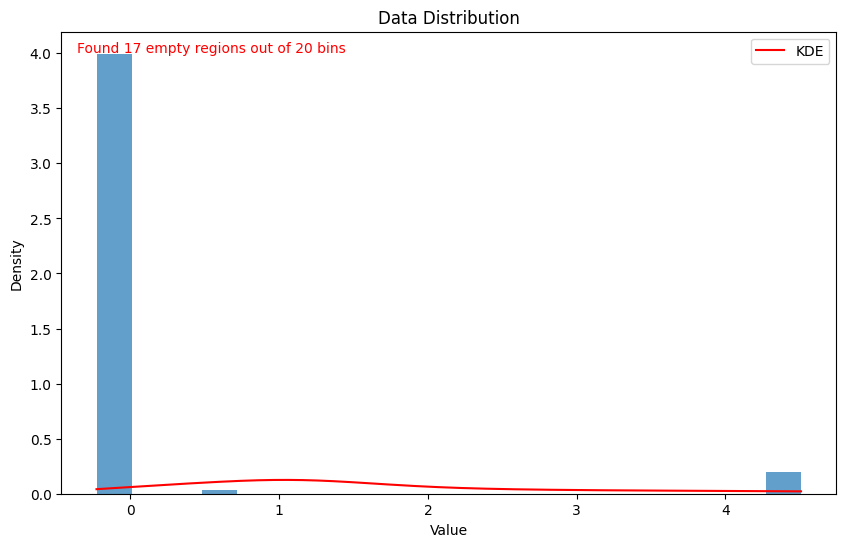

dict_items([('check', 'dimensionality'), ('comply', False), ('explain', 'Data dimensionality: 28\n✗ High dimensionality detected. Consider: Dimensionality reduction techniques, Specialized MCMC methods for high dimensions, Hamiltonian Monte Carlo.')])
dict_items([('check', 'correlation structure'), ('comply', False), ('plot', <Figure size 1000x800 with 2 Axes>), ('data',           0         1         2         3         4         5         6   \
0   1.000000  0.032575 -0.166128  0.045842  0.054327 -0.016758 -0.261466   
1   0.032575  1.000000  0.051876  0.995140 -0.085085 -0.035096  0.071331   
2  -0.166128  0.051876  1.000000  0.024410 -0.148322  0.149062  0.424218   
3   0.045842  0.995140  0.024410  1.000000 -0.079521 -0.044122  0.053181   
4   0.054327 -0.085085 -0.148322 -0.079521  1.000000  0.094327 -0.243306   
5  -0.016758 -0.035096  0.149062 -0.044122  0.094327  1.000000  0.533318   
6  -0.261466  0.071331  0.424218  0.053181 -0.243306  0.533318  1.000000   
7   0.026763 -0.04

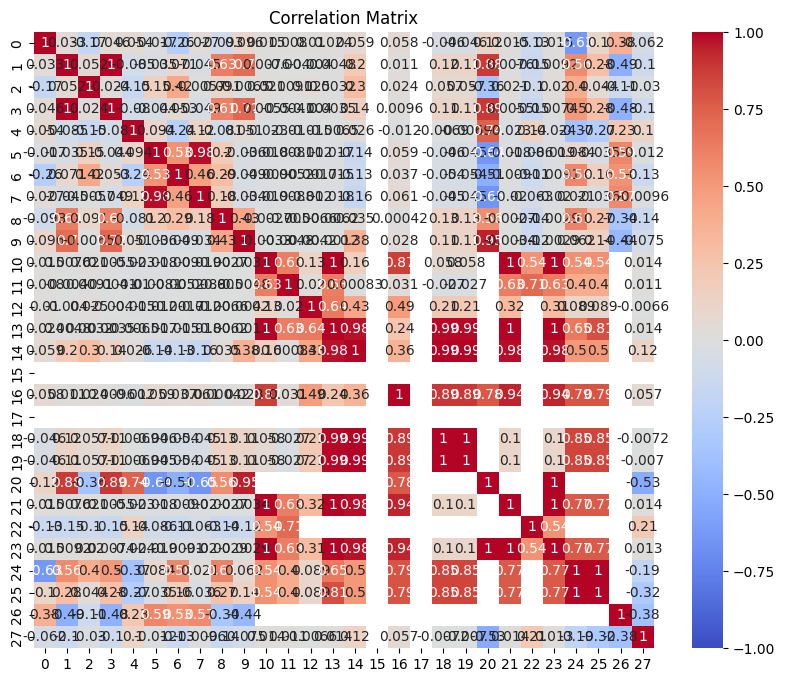

dict_items([('check', 'multimodality'), ('comply', True), ('plot', <Figure size 1000x600 with 1 Axes>), ('data', array([[6.66089926e+12],
       [2.87000000e+02],
       [1.01056300e+00],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [1.73808000e+09]])), ('explain', '✓ Distribution appears to be unimodal ')])
multimodality Figure(1000x600) <class 'matplotlib.figure.Figure'>


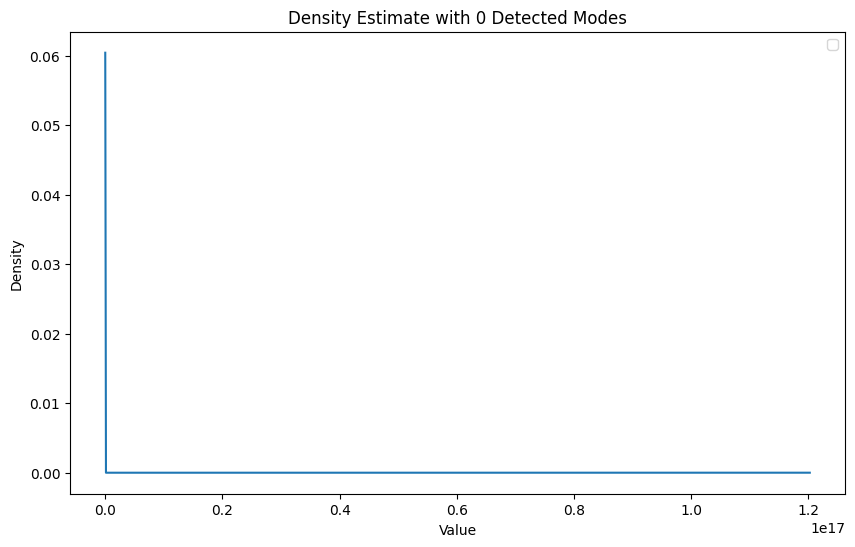

<Figure size 640x480 with 0 Axes>

In [47]:
from IPython.display import display

for x in test_results:
    print(x.items())
    if "plot" in x.keys() and x['plot'] is not None:
        print(x['check'], x['plot'], type(x['plot']))

        display(x['plot'])
plt.figure(x['plot'].number)  # Make the figure active
plt.show()  # Display it"

In [8]:
sdf.printSchema

root
 |-- account_id: long (nullable = true)
 |-- ad_id: long (nullable = true)
 |-- adset_id: long (nullable = true)
 |-- campaign_id: long (nullable = true)
 |-- updated_time: date (nullable = true)
 |-- impressions: integer (nullable = true)
 |-- frequency: double (nullable = true)
 |-- reach: integer (nullable = true)
 |-- CTR: double (nullable = true)
 |-- CPP: double (nullable = true)
 |-- CPC: double (nullable = true)
 |-- CPM: double (nullable = true)
 |-- spend: double (nullable = true)
 |-- clicks: integer (nullable = true)
 |-- objective: string (nullable = true)
 |-- account_currency: string (nullable = true)
 |-- business_country_code: string (nullable = true)
 |-- business_city: string (nullable = true)
 |-- business_state: string (nullable = true)
 |-- timezone_name: string (nullable = true)
 |-- d1_view: double (nullable = true)
 |-- d7_view: double (nullable = true)
 |-- d28_view: double (nullable = true)
 |-- d1_click: double (nullable = true)
 |-- d7_click: double (n